In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\TELEVISION.csv")

In [3]:
df.head()

,Product_Name,Stars,Ratings,Reviews,current_price,MRP,channel,Operating_system,Picture_qualtiy,Speaker,Frequency,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Croma,4.2,1773,217,₹7990,₹20000,HD Ready 1366 x 768 Pixels,20 Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,1 Year Warranty,NaN,NaN,NaN
1,Adsun,3.8,6742,930,₹8699,₹21999,Netflix|Disney+Hotstar|Youtube,Operating System: Android Based,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate,NaN,NaN,NaN
2,LG,4.4,38870,3443,₹16499,₹21990,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: WebOS,HD Ready 1366 x 768 Pixels,10 W Speaker Output,50 Hz Refresh Rate,NaN,NaN,NaN
3,OnePlus,4.3,101256,9189,₹16499,₹21999,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Android,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate,NaN,NaN,NaN
4,Xiaomi,4.3,3120,305,₹15499,₹24999,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Android,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate,NaN,NaN,NaN


In [4]:
df.tail()

,Product_Name,Stars,Ratings,Reviews,current_price,MRP,channel,Operating_system,Picture_qualtiy,Speaker,Frequency,Unnamed: 11,Unnamed: 12,Unnamed: 13
880,SONY,4.5,6056,1082,₹34184,₹68400,Netflix|Prime Video|Youtube,Operating System: Linux based,Ultra HD (4K) 3840 x 2160 Pixels,20 W Speaker Output,50 Hz Refresh Rate,NaN,NaN,NaN
881,Croma,0.0,0,0,₹9194,₹20000,HD Ready 1366 x 786 Pixels,20 Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,3 Years Warranty,NaN,NaN,NaN
882,T-Series,0.0,0,0,₹26999,₹33990,Netflix|Prime Video|Apple TV|Disney+Hotstar|Yo...,Full HD 1920 x 1080 Pixels,16 Speaker Output,50 Hz Refresh Rate,2 x HDMI | 2 x USB,NaN,NaN,NaN
883,Adsun,3.8,6742,930,₹6199,₹12999,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate,1 x HDMI | 2 x USB,A+ Grade,NaN,NaN,NaN
884,SONY,4.4,0,0,₹52949,₹72990,Ultra HD (4K) 3840 x 2160 pixels Pixels,10W + 10W Speaker Output,50 Hz Refresh Rate,2 x HDMI | 2 x USB,1 YEAR,NaN,NaN,NaN


In [5]:
df.shape

(885, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      885 non-null    object 
 1   Stars             885 non-null    float64
 2   Ratings           885 non-null    int64  
 3   Reviews           885 non-null    int64  
 4   current_price     885 non-null    object 
 5   MRP               885 non-null    object 
 6   channel           885 non-null    object 
 7   Operating_system  885 non-null    object 
 8   Picture_qualtiy   885 non-null    object 
 9   Speaker           885 non-null    object 
 10  Frequency         885 non-null    object 
 11  Unnamed: 11       0 non-null      float64
 12  Unnamed: 12       3 non-null      object 
 13  Unnamed: 13       1 non-null      object 
dtypes: float64(2), int64(2), object(10)
memory usage: 96.9+ KB


In [ ]:
# Remove Unnecessary Columns

df = df.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])


In [8]:
# Clean Price Columns

df['current_price'] = df['current_price'].str.replace('₹','').astype(int)
df['MRP'] = df['MRP'].str.replace('₹','').astype(int)


In [13]:
# Check Missing Values
df.isnull().sum()



Product_Name        0
Stars               0
Ratings             0
Reviews             0
current_price       0
MRP                 0
channel             0
Operating_system    0
Picture_qualtiy     0
Speaker             0
Frequency           0
dtype: int64

In [14]:

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
880    False
881    False
882    False
883     True
884    False
Length: 885, dtype: bool

In [15]:
# Discount Amount
df['discount_amount'] = df['MRP'] - df['current_price']


In [16]:
# Discount Percentage
df['discount_percent'] = (df['discount_amount'] / df['MRP']) * 100


In [17]:
# Rating Category
def rating_category(rating):
    if rating >= 4.5:
        return 'Excellent'
    elif rating >= 4.0:
        return 'Good'
    else:
        return 'Average'

df['rating_category'] = df['Stars'].apply(rating_category)


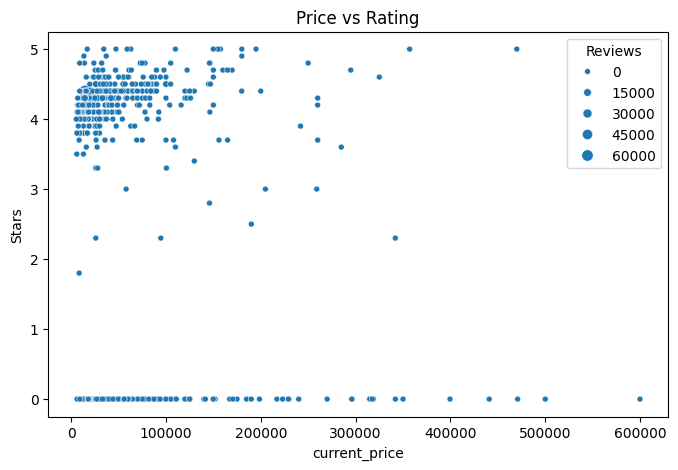

In [ ]:
# Price vs Rating

plt.figure(figsize=(8,5))
sns.scatterplot(x='current_price', y='Stars', size='Reviews', data=df)
plt.title("Price vs Rating")
plt.show()



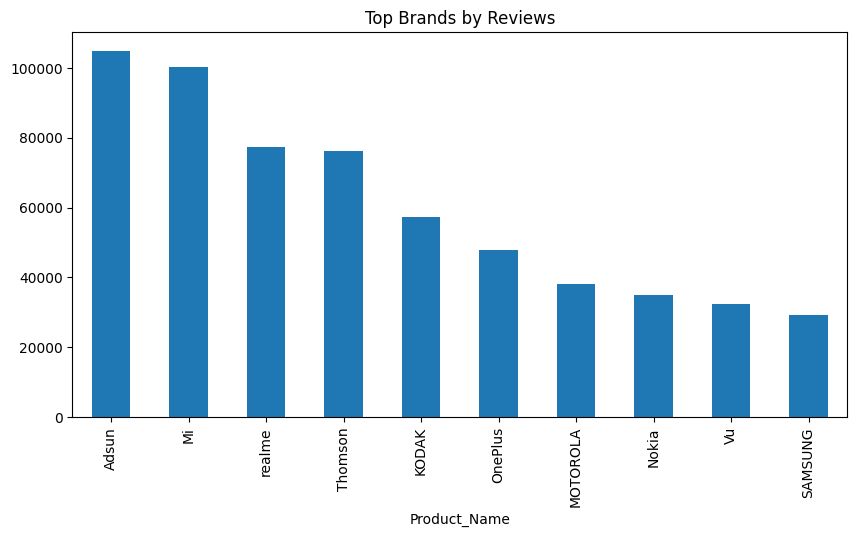

In [ ]:
# Top Brands 

brand_reviews = df.groupby('Product_Name')['Reviews'].sum().sort_values(ascending=False)

brand_reviews.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top Brands by Reviews")
plt.show()


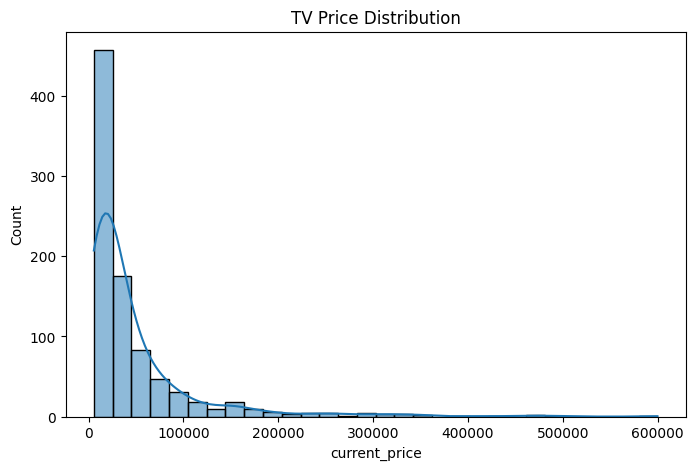

In [ ]:
# Price Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['current_price'], bins=30, kde=True)
plt.title("TV Price Distribution")
plt.show()


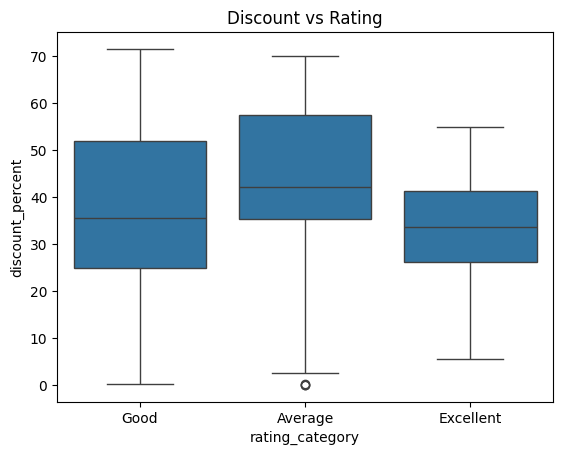

In [26]:
# Discount vs Rating 

sns.boxplot(x='rating_category', y='discount_percent', data=df)
plt.title("Discount vs Rating")
plt.show()


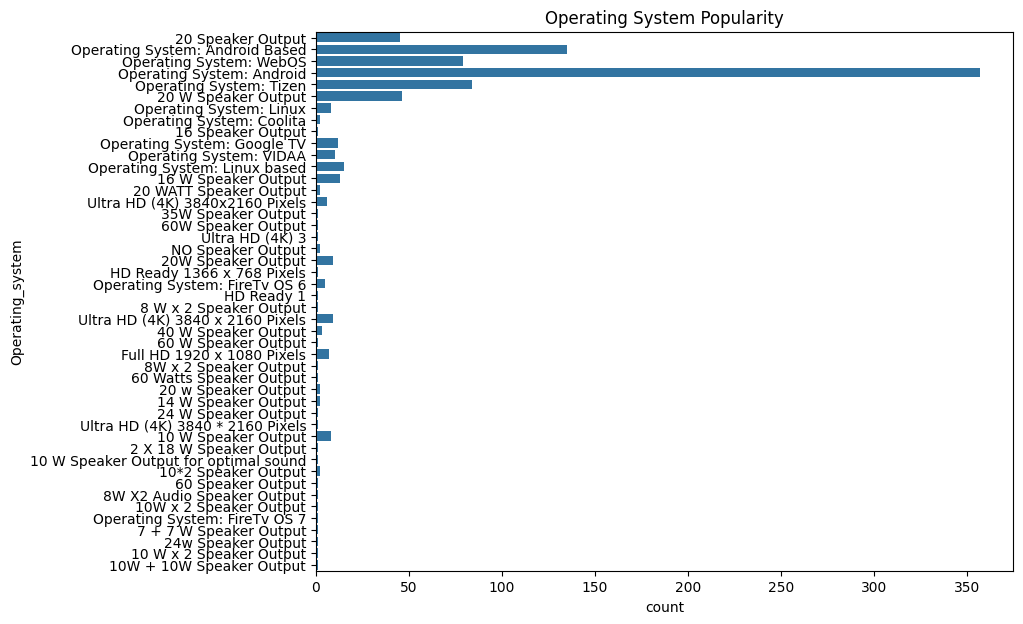

In [33]:
# Operating System Analysis

plt.figure(figsize=(9,7))

sns.countplot(y='Operating_system', data=df)
plt.title("Operating System Popularity")
plt.show()
